In [1]:
"""This sript reads xlsx files provided by Facebook with a glimpse of data on Visible Hand group.
Each file consists of several sheets, where two are of interest for this analysis:
a) Daily numbers, with data like date, number of new posts, etc
b) top posts, where posts from last 28 days are collected."""

'This sript reads xlsx files provided by Facebook with a glimpse of data on Visible Hand group.\nEach file consists of several sheets, where two are of interest for this analysis:\na) Daily numbers, with data like date, number of new posts, etc\nb) top posts, where posts from last 28 days are collected.'

In [14]:
# Import libraries

import pandas as pd
import os
import googletrans as gt
import matplotlib.pyplot as plt
from googletrans import Translator
from collections import Counter
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import seaborn as sns

[nltk_data] Downloading package stopwords to /home/maciek/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/maciek/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Index(['Date', 'Posts', 'Comments', 'Reactions', 'Active members',
       'Total members', 'Pending members', 'Approved member requests',
       'Declined member requests'],
      dtype='object')


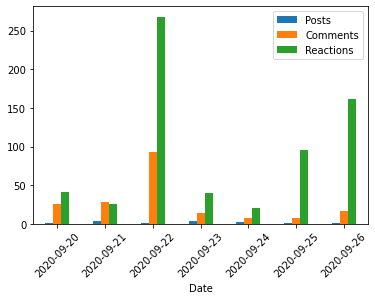

In [3]:
# Reading the first file, and ploting posts, comments and reactions over time

glimpse = pd.read_excel("data/Facebook_Group_Insights_10-25-2020.xlsx", sheet_name="Daily numbers")
print(glimpse.columns)
glimpse.head()
glimpse.plot(kind="bar", x="Date", y=["Posts", "Comments", "Reactions"])
plt.xticks(rotation=45)
plt.show()

In [4]:
# Use Google Tranlsate to translate content of posts.

texts = pd.read_excel("data/Facebook_Group_Insights_10-25-2020.xlsx", sheet_name="Top posts (last 28 days)")
print(texts.head())

translator = Translator()

eng_text = []

for row in texts['Posts']: 
    if isinstance(row, str):
        eng_text.append(translator.translate(row).text)
    else:
        eng_text.append("empty entry")

texts['Posts_en'] = eng_text


                                               Posts  \
0  Edit: \nLudzie jesteście wspaniali!!! Mamy już...   
1  #koronawirus#rozmowa#\nCzy ktoś właśnie walczy...   
2  16 zaleceń na czas pandemii\n—-\nDrogie osoby☝...   
3  Drodzy,\n\nszukam pomocy dla bardzo samotnej P...   
4  Czy jest tu jakaś dobra dusza z Rzeszowa, któr...   

                         Member  Comments  Reactions  Views  \
0        Julia Ewa Hertmanowska       188        714  53593   
1                 Ania Augustyn       136        649  48515   
2                Filip Żulewski       106        777  33188   
3   Kamilla Hertmanowska-Maniuk       107        693  45601   
4  Izabela Zdolinska-Malinowska        40        439  40967   

                                                Link  
0  https://www.facebook.com/groups/widzialnareka/...  
1  https://www.facebook.com/groups/widzialnareka/...  
2  https://www.facebook.com/groups/widzialnareka/...  
3  https://www.facebook.com/groups/widzialnareka/...  
4  https:

In [5]:
texts.head()

,Posts,Member,Comments,Reactions,Views,Link,Posts_en
0,Edit: \nLudzie jesteście wspaniali!!! Mamy już...,Julia Ewa Hertmanowska,188,714,53593,https://www.facebook.com/groups/widzialnareka/...,Edit:\nYou guys are great !!! We already have ...
1,#koronawirus#rozmowa#\nCzy ktoś właśnie walczy...,Ania Augustyn,136,649,48515,https://www.facebook.com/groups/widzialnareka/...,# coronavirus # conversation #\nIs anyone curr...
2,16 zaleceń na czas pandemii\n—-\nDrogie osoby☝...,Filip Żulewski,106,777,33188,https://www.facebook.com/groups/widzialnareka/...,16 recommendations for the time of a pandemic\...
3,"Drodzy,\n\nszukam pomocy dla bardzo samotnej P...",Kamilla Hertmanowska-Maniuk,107,693,45601,https://www.facebook.com/groups/widzialnareka/...,Dear\n\nI am looking for help for a very lonel...
4,"Czy jest tu jakaś dobra dusza z Rzeszowa, któr...",Izabela Zdolinska-Malinowska,40,439,40967,https://www.facebook.com/groups/widzialnareka/...,Is there any good soul from Rzeszów who would ...


In [35]:
# In order to to word popularity chart, we will collapse all the entries in to one, split into list and remove stopwords from given list.

eng_entries = texts['Posts_en'].str.cat(sep=' ')
eng_tokens = word_tokenize(eng_entry_list)
print(f"Word count before stopword filter applied: {len(eng_tokens)}")
eng_entry_no_sw = [word for word in eng_tokens if word.isalnum()]
eng_entry_no_sw = [word.lower() for word in eng_tokens]
eng_entry_clean = [word for word in eng_entry_no_sw  if not word in stopwords.words()]
print(f"Word counter after stopword filter applied: {len(eng_entry_clean)}")

Word count before stopword filter applied: 10595
Word counter after stopword filter applied: 4188


In [46]:
# As we've got our bag of words ready, Counter will be applied to create a dictionary of words from most popular down.

words_count = Counter(eng_entry_clean)
top_words = pd.DataFrame.from_dict(words_count, orient='index').reset_index()
top_words = top_words.rename(columns={'index':'word', 0:'count'})
top_words = top_words.sort_values(by='count', ascending=False)
top_words.head(10)

,word,count
21,help,93
123,group,83
234,https,66
118,people,46
151,need,38
429,post,36
53,would,35
122,hand,23
138,warsaw,21
59,us,20


In [ ]:
# In the final step we will prepare a neat presentation of colected data, including a Seaborne chart.
